# 3. Exploratory Data Analysis

## 3.1 Importing Modules

In [110]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from collections import Set
from datetime import datetime

from library.sb_utils import save_file

## 3.2 Importing Data

In [2]:
movies_metadata=pd.read_csv('../data/movies_metadata_cleaned.csv')
ratings=pd.read_csv('../data/ratings.cleaned.csv')
keywords=pd.read_csv('../data/keywords_cleaned.csv')
links=pd.read_csv('../data/links_cleaned.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,3,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 3.3 Movies Metadata

### 3.3.1 Genres EDA

In [3]:
movies_metadata.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,new_budget
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,30000000
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,65000000
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,16000000
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,0


#### 3.3.1.2 Genres Formatting

In [4]:
# function extracts genre
def extract_genre(row):
    """This function takes the string text in genres columns and collects the genres into a list"""
    genre=re.findall(r"'name':\s'(\w+)'",row)
    return genre

#creates a new column genres_list
movies_metadata['genres_list']=movies_metadata['genres'].apply(lambda row: extract_genre(row))

In [5]:
# determing the possible genres
gen_coll=[]
for movie in movies_metadata['genres_list']:
    for val in movie:
        if val not in gen_coll:
            gen_coll.append(val)
gen_coll

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'History',
 'Mystery',
 'War',
 'Foreign',
 'Music',
 'Documentary',
 'Western']

In [6]:
movies_metadata['genres_list'].value_counts()

[Drama]                                              5210
[Comedy]                                             3725
[Documentary]                                        2754
[]                                                   2652
[Drama, Romance]                                     1342
                                                     ... 
[Drama, Comedy, Romance, Family, Foreign]               1
[War, Animation]                                        1
[Comedy, Action, Adventure, Romance]                    1
[Action, Thriller, Mystery, Horror]                     1
[Drama, Horror, Action, Thriller, Crime, Foreign]       1
Name: genres_list, Length: 3154, dtype: int64

In [7]:
# percentage of movies without genre data
2652/len(movies_metadata['genres_list'])

0.058390946320841956

In [8]:
# determining if the empty list is due to missing genre data
movies_metadata.loc[movies_metadata['genres']=='[]', ['genres', 'genres_list']]

,genres,genres_list
55,[],[]
83,[],[]
126,[],[]
137,[],[]
390,[],[]
...,...,...
45399,[],[]
45400,[],[]
45407,[],[]
45416,[],[]


Now, I need to determine the distribution of genres. There are 1783 movies that that a unique genre.

#### 3.3.1.2 Summary Statistics

In [9]:
genre_grp=pd.DataFrame(movies_metadata['genres_list'].value_counts())
genre_grp.rename({'genres_list':'count'}, axis=1, inplace=True)
genre_grp['prop_count']=genre_grp['count'].apply(lambda row: row/np.sum(genre_grp['count']))
genre_grp

,count,prop_count
[Drama],5210,0.114712
[Comedy],3725,0.082016
[Documentary],2754,0.060637
[],2652,0.058391
"[Drama, Romance]",1342,0.029548
...,...,...
"[Drama, Comedy, Romance, Family, Foreign]",1,0.000022
"[War, Animation]",1,0.000022
"[Comedy, Action, Adventure, Romance]",1,0.000022
"[Action, Thriller, Mystery, Horror]",1,0.000022


In [10]:
# summary statistics for the genre counts
genre_grp['count'].describe()

count    3154.000000
mean       14.400127
std       143.290550
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      5210.000000
Name: count, dtype: float64

In [11]:
# determinig the number of genres with 1, 2, or 3 movies in each
genre_grp[genre_grp['count'].isin([1,2,3])].shape

(2374, 2)

In [12]:
# number of genres with 1, 2, or 3 movies, respectively
genre_grp[genre_grp['count'].isin([1])].shape, genre_grp[genre_grp['count'].isin([2])].shape, genre_grp[genre_grp['count'].isin([3])].shape

((1783, 2), (404, 2), (187, 2))

#### 3.3.1.3 Creating Dummy Variables

In [13]:
# function creates a column of zeros for each genre 
def dummy_var_col(genres, df):
    """This function creates a column for each of the genres
    dummy_var_col(genres, df)
    -genres: the list for new columns
    -df is the dataframe where you want to create the columns"""
    
    for genre in genres:
        df[genre]=0


In [14]:
# creates the columns
dummy_var_col(gen_coll, movies_metadata)

# checks to see if the columns were created
movies_metadata.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'new_budget', 'genres_list', 'Animation', 'Comedy', 'Family',
       'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'History', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', 'Western'],
      dtype='object')

In [15]:
# function that fills in the values for the dummy variables
def dummy_var_value(col_name, df):
    for index, value in df.iterrows():
        for genre in value[col_name]:
            df.loc[index, genre]=1
    return df

In [16]:
#filling in values for dummy variable
movies_metadata=dummy_var_value('genres_list', movies_metadata)

# testing
movies_metadata.loc[0]

adult                                                               False
budget                                                           30000000
genres                  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
id                                                                    862
imdb_id                                                         tt0114709
original_language                                                      en
original_title                                                  Toy Story
overview                Led by Woody, Andy's toys live happily in his ...
poster_path                              /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
production_companies       [{'name': 'Pixar Animation Studios', 'id': 3}]
production_countries    [{'iso_3166_1': 'US', 'name': 'United States o...
release_date                                                   1995-10-30
revenue                                                       3.73554e+08
runtime                               

#### 3.3.1.4 dropping genres columns

In [17]:
# dropped genres and genres_list columns
movies_metadata.drop(columns=['genres'], inplace=True)

#checking columns were removed
movies_metadata.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'new_budget', 'genres_list', 'Animation', 'Comedy', 'Family',
       'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'History', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', 'Western'],
      dtype='object')

#### 3.3.1.5 Genre Summary

There are 3154 different movie genres. The interquartile range is between 1 and 3 movies; thus, the middle 50% of genres only contain 1 through 3 movies, which suggests the genres are too specific. From those different movies genres, there are 1783, 404, and 187 movies that have a genre that contains only one, two, or three movies, respectively. There are 2652 movies that lack genre data, which accounts for about 5.8% of the movies. The movies with unique value for genre will not yield reliable predictive results since there is a very limited number of them. For example, there is only one movie that is a drama, comedy, romance, family, and foreign, so that movie cannot be directly related to other films. I split each possible genre into a dummy variable. I will likely use unsupervised learning to determine, which genres are the most important.

### 3.3.2 Production Company

#### 3.3.2.1 Formatting

In [18]:
# looking at the values in the production_companies column
movies_metadata['production_companies'].value_counts()

[]                                                                                                                                                                                                                                                                          11858
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                                                                                                                                                                                           742
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                                                                                                                                                                        540
[{'name': 'Paramount Pictures', 'id': 4}]                                                                                                                                         

In [19]:
# need to convert production_companies to strings
movies_metadata['production_companies']=movies_metadata['production_companies'].apply(lambda row: str(row))

In [20]:
#creates a new column production_company_list

def extract_prod_company(row):
    prod=re.findall(r"'name':\s'(.+?)'",row)
    return prod
    
# extracts production company name into a list
movies_metadata['production_companies_list']=movies_metadata['production_companies'].apply(lambda row: extract_prod_company(row))

#checking the results
movies_metadata['production_companies_list']

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
45413                                                   []
45414                                        [Sine Olivia]
45415                            [American World Pictures]
45416                                          [Yermoliev]
45417                                                   []
Name: production_companies_list, Length: 45418, dtype: object

#### 3.3.2.3 Dealing with missing values

In [21]:
# determining the number of missing values and percentage of missing values
prod_non_missing=np.sum(movies_metadata['production_companies_list'].apply(lambda row: bool(row)))

prod_missing=len(movies_metadata['production_companies_list']) - prod_non_missing

prod_missing, prod_missing/len(movies_metadata['production_companies_list'])

(11920, 0.26245101061253245)

#### 3.3.2.4 Range of values for production companies

In [22]:
# counts for the different production companies
prod_count=pd.DataFrame(movies_metadata['production_companies_list'].value_counts())
prod_count

,production_companies_list
[],11920
[Metro-Goldwyn-Mayer (MGM)],772
[Warner Bros.],540
[Paramount Pictures],504
[Twentieth Century Fox Film Corporation],441
...,...
[RTL Entertainment],1
"[Kartemquin Films, Rise Films]",1
"[TriStar Pictures, Palisades California Inc.]",1
"[BBC Films, Bend It Films, Pathé]",1


In [23]:
# descriptive statistics
prod_count.describe()

,production_companies_list
count,22577.000000
mean,2.011693
std,79.795465
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11920.000000


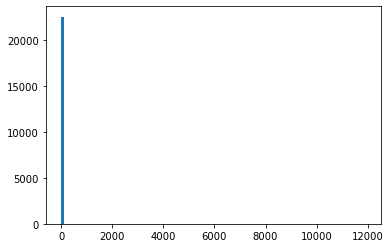

In [24]:
plt.hist(prod_count['production_companies_list'], bins=100, histtype='bar')
plt.show()

In [25]:
prod_count.loc[prod_count['production_companies_list']==1, 'production_companies_list'].sum(), prod_count.loc[prod_count['production_companies_list']==1, 'production_companies_list'].sum()/prod_count.shape[0]

(20233, 0.8961775258005935)

#### 3.3.2.5 Dropping production_companies

In [26]:
movies_metadata.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'new_budget', 'genres_list', 'Animation', 'Comedy', 'Family',
       'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'History', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', 'Western', 'production_companies_list'],
      dtype='object')

In [27]:
# dropping indicated columns
movies_metadata.drop(columns=['production_companies'], inplace=True)

# makeing sure the proper columns are dropped
movies_metadata.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'poster_path', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'title', 'vote_average', 'vote_count', 'new_budget', 'genres_list',
       'Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Mystery',
       'War', 'Foreign', 'Music', 'Documentary', 'Western',
       'production_companies_list'],
      dtype='object')

#### 3.3.2.6 Production Companies Conclusion

There are 1192 movies missing production company, which accounts for approximately 26% of the movies. There are 22292 different production companies or combination of production companies. From those 22292 companies, the majority only have one movie in the sample because the interquartile range is 0. In fact, 19997 companies only have one movie, which is 89.7% of the movies. Thus, I dropped production companies from the dataset.

### 3.3.3 Adult, status, original_title, production_countries, run_time, and poster_path

#### 3.3.3.1 dropping status, adult and poster path

In [28]:
# drop columns
movies_metadata.drop(columns=['adult', 'poster_path', 'status', 'original_title', 'production_countries', 'runtime'], inplace=True)

# ensuring the columns are dropped
movies_metadata.columns

Index(['budget', 'id', 'imdb_id', 'original_language', 'overview',
       'release_date', 'revenue', 'spoken_languages', 'title', 'vote_average',
       'vote_count', 'new_budget', 'genres_list', 'Animation', 'Comedy',
       'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'History', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', 'Western', 'production_companies_list'],
      dtype='object')

### 3.3.4 Budget

#### 3.3.4.1 Descriptive Statistics

In [29]:
movies_metadata['budget'].describe()

count    4.541800e+04
mean     4.225889e+06
std      1.743071e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

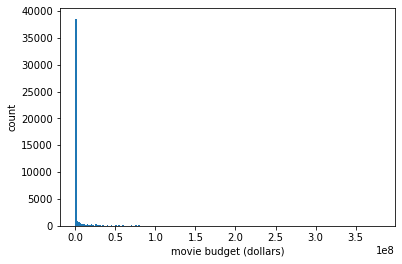

In [30]:
# histogram for budget
bins=int(np.sqrt(len(movies_metadata['budget'])))
plt.hist(movies_metadata['budget'], bins=bins, histtype='bar')
plt.xlabel('movie budget (dollars)')
plt.ylabel('count')
plt.show()

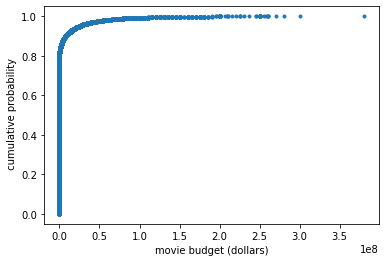

In [31]:
# ECDF for budget

def ECDF(var):
    x=np.sort(var)
    y=np.arange(1, len(x)+1)/len(x)
    
    return x,y

x, y= ECDF(movies_metadata['budget'])

plt.plot(x, y, linestyle='none', marker='.')
plt.xlabel('movie budget (dollars)')
plt.ylabel(' cumulative probability')
plt.show()

#### 3.3.4.2 Getting Count variables for budget

In [32]:
budget_count=pd.DataFrame(movies_metadata['budget'].value_counts())
budget_count.rename({'budget':'count'}, axis=1, inplace=True)

In [33]:
# determining the percentage of data points in each category
budget_count['prop_count']=budget_count['count'].apply(lambda row: row/np.sum(budget_count['count']))
budget_count.head()

,count,prop_count
0,36539,0.804505
5000000,286,0.006297
10000000,258,0.005681
20000000,243,0.005350
2000000,242,0.005328


#### 3.3.4.3 Budget Summary

Since about 80% of budget data is zero, budget is not likely to provide useful information. 

### 3.3.5 new_budget

#### 3.3.5.1 Descriptive Statistics

In [34]:
movies_metadata['new_budget'].describe()

count     45418
unique     1451
top           0
freq      25216
Name: new_budget, dtype: object

In [35]:
# replaces 0 and 'np.nan' with '0'
movies_metadata['new_budget']=movies_metadata['new_budget'].replace({0:'0', 'np.nan':'0'})

movies_metadata['new_budget'].value_counts()

0           36539
5000000       232
10000000      219
20000000      218
15000000      209
            ...  
25485000        1
478375          1
7300            1
2970000         1
2494400         1
Name: new_budget, Length: 1449, dtype: int64

In [36]:
# make budget an integer
movies_metadata['new_budget']=movies_metadata['new_budget'].apply(lambda row: int(row))

# descriptive statistics again
movies_metadata['new_budget'].describe()


count    4.541800e+04
mean     4.225889e+06
std      1.743071e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: new_budget, dtype: float64

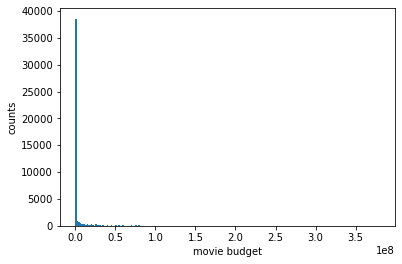

In [37]:
# plotting a histogram
bins=int(np.sqrt(len(movies_metadata['new_budget'])))
plt.hist(movies_metadata['new_budget'], bins=bins, histtype='bar')
plt.xlabel('movie budget')
plt.ylabel('counts')
plt.show()

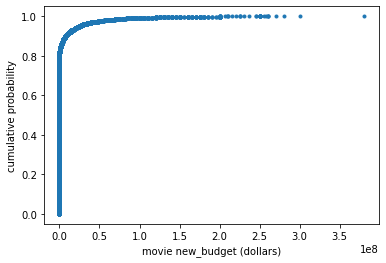

In [38]:
# plotting ECDF for new_budget
x, y = ECDF(movies_metadata['new_budget'])

plt.plot(x, y, linestyle='none', marker='.')
plt.xlabel('movie new_budget (dollars)')
plt.ylabel('cumulative probability')
plt.show()

#### 3.3.5.2 correlation between budget and new_budget

In [39]:
np.corrcoef(movies_metadata['budget'], movies_metadata['new_budget'])

array([[1., 1.],
       [1., 1.]])

#### 3.3.5.3 Droping budget and new_budget

In [40]:
movies_metadata.drop(columns=['budget', 'new_budget'], inplace=True)

#### 3.3.5.4 new_budget Summary

Budget and new_budget have a correlation coefficient of 1 and their ECDF's look identical; therefore, they contain the same information. Since budget doesn't contain useful information, new_budget also doesn't contain useful information. 

### 3.3.6 original_language

#### 3.3.6.1 Descriptive Statistics

In [41]:
movies_metadata['original_language'].describe()

count     45407
unique       90
top          en
freq      32239
Name: original_language, dtype: object

#### 3.3.6.2 Value counts

In [42]:
# creating counts for each language
language_count=pd.DataFrame(movies_metadata['original_language'].value_counts())
language_count.rename({'original_language':"count"}, axis=1, inplace=True)

language_count['prop_count']=language_count['count'].apply(lambda row: row/np.sum(language_count['count']))
language_count.head()

,count,prop_count
en,32239,0.710001
fr,2435,0.053626
it,1529,0.033673
ja,1346,0.029643
de,1079,0.023763


In [43]:
# descriptive statistics for the counts
language_count['count'].describe()

count       90.000000
mean       504.522222
std       3403.055257
min          1.000000
25%          2.000000
50%         11.000000
75%         94.500000
max      32239.000000
Name: count, dtype: float64

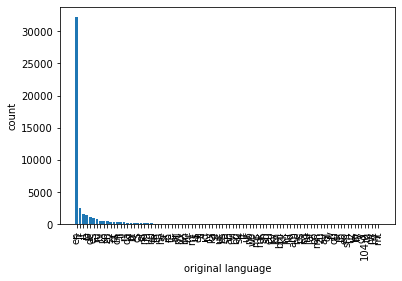

In [44]:
# bar plot for the number of movies with each original language
fig, ax = plt.subplots()

ax.bar(language_count.index, height=language_count['count'])
ax.set_xticklabels(language_count.index, rotation=90)
ax.set_xlabel('original language')
ax.set_ylabel('count')
plt.show()

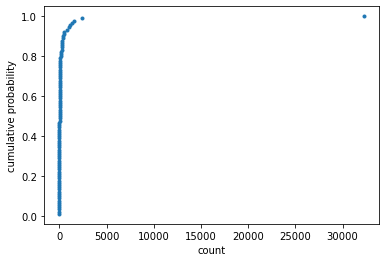

In [45]:
# plotting ECDF for the counts
x, y= ECDF(language_count['count'])

plt.plot(x, y, linestyle='none', marker='.')
plt.xlabel('count')
plt.ylabel('cumulative probability')
plt.show()

In [46]:
language_count.loc[language_count['count']<10, 'count'].sum()

111

#### 3.3.6.3 Creating other language category

In [47]:
# collecting languages that are used in less than 10 movies
other_language=language_count[language_count['count']<10].index
other_language

Index(['sk', 'lt', 'ur', 'nb', 'wo', 'ms', 'mk', 'sh', 'sq', 'eu', 'ky', 'kn',
       'bm', 'kk', 'ku', 'lo', 'am', 'ne', 'ps', 'pa', 'iu', 'af', 'bo', 'mn',
       'zu', 'ay', 'gl', 'jv', 'qu', 'si', 'lb', 'eo', 'sm', 'uz', 'la', 'fy',
       'cy', '104.0', 'tg', 'rw', 'hy', 'mt'],
      dtype='object')

In [48]:
# create a dictionary to replace them with 'other'

other_dict={}

for lan in other_language:
    other_dict[lan]='other'
    
other_dict

{'sk': 'other',
 'lt': 'other',
 'ur': 'other',
 'nb': 'other',
 'wo': 'other',
 'ms': 'other',
 'mk': 'other',
 'sh': 'other',
 'sq': 'other',
 'eu': 'other',
 'ky': 'other',
 'kn': 'other',
 'bm': 'other',
 'kk': 'other',
 'ku': 'other',
 'lo': 'other',
 'am': 'other',
 'ne': 'other',
 'ps': 'other',
 'pa': 'other',
 'iu': 'other',
 'af': 'other',
 'bo': 'other',
 'mn': 'other',
 'zu': 'other',
 'ay': 'other',
 'gl': 'other',
 'jv': 'other',
 'qu': 'other',
 'si': 'other',
 'lb': 'other',
 'eo': 'other',
 'sm': 'other',
 'uz': 'other',
 'la': 'other',
 'fy': 'other',
 'cy': 'other',
 '104.0': 'other',
 'tg': 'other',
 'rw': 'other',
 'hy': 'other',
 'mt': 'other'}

In [49]:
# replace the selected languages with other
movies_metadata['original_language'].replace(other_dict, inplace=True)

# testing
len(movies_metadata.loc[movies_metadata['original_language']=='other', 'original_language'])

111

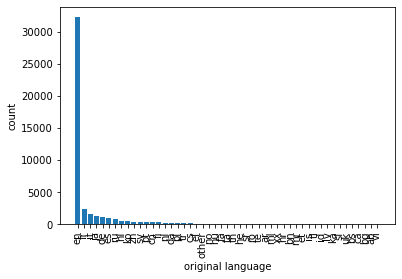

In [50]:
# replotting the bar graph

# creating counts for each language
language_count=pd.DataFrame(movies_metadata['original_language'].value_counts())
language_count.rename({'original_language':"count"}, axis=1, inplace=True)

language_count['prop_count']=language_count['count'].apply(lambda row: row/np.sum(language_count['count']))
language_count.head()

# bar plot for the number of movies with each original language
fig, ax = plt.subplots()

ax.bar(language_count.index, height=language_count['count'])
ax.set_xticklabels(language_count.index, rotation=90)
ax.set_xlabel('original language')
ax.set_ylabel('count')
plt.show()

### 3.3.6.4 Original Language Summary

Approximately 71% of the movies were originally created in English. The second most common language is French with 5%. There are 111 languages that have less than 10 movies, which were replaced with 'other'. Since languages are skewed to only a few, I will not be using languages in my analysis

### 3.3.7 Spoken Languages

#### 3.3.7.1 Spoken Language Formatting

In [51]:
# make sure spoken language is a string
movies_metadata['spoken_languages']=movies_metadata['spoken_languages'].astype(str)

#### 3.3.7.2 Extracting data

In [52]:
# function that collects the spoken languages
def extract_language(row):
    lang=re.findall(r"'iso_639_1':\s'(\w+)", row)
    return lang


In [53]:
# extracting the spoken languages
movies_metadata['spoken_languages_list']=movies_metadata['spoken_languages'].apply(lambda row: extract_language(row))

In [54]:
# function creates count and proportion for strings
def string_count(colname, df):
    """This function take a dataframe df and a column name colname where the column is a string, and creates a dataframe 
    with a count and proportion for each group of strings."""
    
    col_count=pd.DataFrame(movies_metadata[colname].value_counts())
    col_count.rename({colname:"count"}, axis=1, inplace=True)

    col_count['prop_count']=col_count['count'].apply(lambda row: row/np.sum(col_count['count']))
    return col_count


#### 3.3.7.3 Descriptive Statistics

In [55]:
movies_metadata['spoken_languages_list'].value_counts()

[en]                        22379
[]                           3824
[fr]                         1850
[ja]                         1286
[it]                         1218
                            ...  
[fa, en, fr, hi]                1
[es, en, ko]                    1
[ja, ko, es]                    1
[sq, en, fr, ru, sh, es]        1
[de, en, es, fr, ru]            1
Name: spoken_languages_list, Length: 1931, dtype: int64

In [56]:
spoken_language_count=string_count('spoken_languages_list', movies_metadata)

spoken_language_count

,count,prop_count
[en],22379,0.492734
[],3824,0.084196
[fr],1850,0.040733
[ja],1286,0.028315
[it],1218,0.026818
...,...,...
"[fa, en, fr, hi]",1,0.000022
"[es, en, ko]",1,0.000022
"[ja, ko, es]",1,0.000022
"[sq, en, fr, ru, sh, es]",1,0.000022


#### 3.3.7.3 Descriptive Statistics

In [57]:
spoken_language_count['count'].describe()

count     1931.000000
mean        23.520456
std        521.762337
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      22379.000000
Name: count, dtype: float64

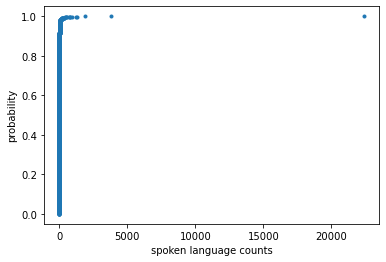

In [58]:
# ECDF for spoken languages count
x,y=ECDF(spoken_language_count['count'])

plt.plot(x, y, linestyle='none', marker='.')
plt.xlabel('spoken language counts')
plt.ylabel('probability')
plt.show()

#### 3.3.7.4 spoken language summary

English is the most spoken language in the set because it is the only language spoken in 49% of the movies. Approximately 8% of the movies is missing spoken language data. French is the second most spoken language at 4% of movies speaking French. From the ECDF, it appears that the majority of languages are only spoken in one movie, which is further supported because the IQR for the language counts is 1 with a mean of 1 and a minimum of 1. Thus, the middle 50% of languages are only spoken in 1 or 2 movies. Due to the highly skewed data, spoken languages will likely not provide useful information in detecting similarities between movies

### 3.3.8 id, imdb_id, and title

id, imdb_id, and title will not be used in analysis since these items are unique for each row; however, I will keep the data in the table for now in case I need the information. Also, id will be used to merge the movies_metadata with the links and credits databases

### 3.3.9 overview

In [59]:
movies_metadata.head(3)

,id,imdb_id,original_language,overview,release_date,revenue,spoken_languages,title,vote_average,vote_count,...,Horror,History,Mystery,War,Foreign,Music,Documentary,Western,production_companies_list,spoken_languages_list
0,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,...,0,0,0,0,0,0,0,0,[Pixar Animation Studios],[en]
1,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,...,0,0,0,0,0,0,0,0,"[TriStar Pictures, Teitler Film, Interscope Co...","[en, fr]"
2,15602,tt0113228,en,A family wedding reignites the ancient feud be...,1995-12-22,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,...,0,0,0,0,0,0,0,0,"[Warner Bros., Lancaster Gate]",[en]


Overview contains a string of information that provides an overview of the movie. This data will not be used in this model; however, NLP techniques could be utilized on it at a later time

In [60]:
movies_metadata.columns

Index(['id', 'imdb_id', 'original_language', 'overview', 'release_date',
       'revenue', 'spoken_languages', 'title', 'vote_average', 'vote_count',
       'genres_list', 'Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western',
       'production_companies_list', 'spoken_languages_list'],
      dtype='object')

### 3.3.10 Release_date

#### 3.3.10.1 Release Date Formatting

In [61]:
#checking data types
movies_metadata.dtypes

id                            object
imdb_id                       object
original_language             object
overview                      object
release_date                  object
revenue                      float64
spoken_languages              object
title                         object
vote_average                 float64
vote_count                   float64
genres_list                   object
Animation                      int64
Comedy                         int64
Family                         int64
Adventure                      int64
Fantasy                        int64
Romance                        int64
Drama                          int64
Action                         int64
Crime                          int64
Thriller                       int64
Horror                         int64
History                        int64
Mystery                        int64
War                            int64
Foreign                        int64
Music                          int64
D

In [62]:
# checkin for missing values
movies_metadata.isna().any()

id                           False
imdb_id                       True
original_language             True
overview                      True
release_date                  True
revenue                       True
spoken_languages             False
title                         True
vote_average                  True
vote_count                    True
genres_list                  False
Animation                    False
Comedy                       False
Family                       False
Adventure                    False
Fantasy                      False
Romance                      False
Drama                        False
Action                       False
Crime                        False
Thriller                     False
Horror                       False
History                      False
Mystery                      False
War                          False
Foreign                      False
Music                        False
Documentary                  False
Western             

In [63]:
# determining date time format
movies_metadata['release_date'][:10]

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
5    1995-12-15
6    1995-12-15
7    1995-12-22
8    1995-12-22
9    1995-11-16
Name: release_date, dtype: object

In [64]:
# ensure release date is a string
movies_metadata['release_date']=movies_metadata['release_date'].astype(str)

# replace 'nan' with 1776-07-04
movies_metadata['release_date']=movies_metadata['release_date'].replace('nan', '1776-07-04')

In [65]:
# convert the string into a datetime
movies_metadata['release_date']=movies_metadata['release_date'].apply(lambda row: datetime.strptime(row, '%Y-%m-%d'))

In [66]:
# checking to make sure it worked
movies_metadata.dtypes

id                                   object
imdb_id                              object
original_language                    object
overview                             object
release_date                 datetime64[ns]
revenue                             float64
spoken_languages                     object
title                                object
vote_average                        float64
vote_count                          float64
genres_list                          object
Animation                             int64
Comedy                                int64
Family                                int64
Adventure                             int64
Fantasy                               int64
Romance                               int64
Drama                                 int64
Action                                int64
Crime                                 int64
Thriller                              int64
Horror                                int64
History                         

#### 3.3.10.2 Release Date Descriptive Statistics

In [67]:
movies_metadata['release_date'].describe()

count                   45418
unique                  17334
top       2008-01-01 00:00:00
freq                      136
first     1776-07-04 00:00:00
last      2020-12-16 00:00:00
Name: release_date, dtype: object

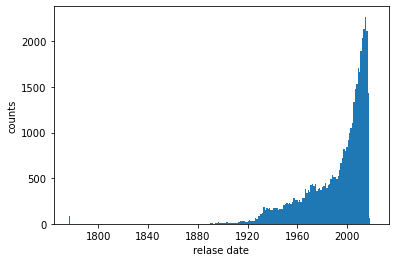

In [68]:
# plotting a historgram of the dates
bins=int(np.sqrt(len(movies_metadata['release_date'])))
plt.hist(movies_metadata['release_date'], bins=bins, histtype='bar')
plt.xlabel('relase date')
plt.ylabel('counts')
plt.show()

In [69]:
# getting counts for the release dates
release_date_count=string_count('release_date', movies_metadata)

release_date_count.reset_index(inplace=True)
release_date_count.rename({'index':'date'}, axis=1, inplace=True)
release_date_count.sort_values('date')

,date,count,prop_count
7,1776-07-04,85,0.001872
11756,1874-12-09,1,0.000022
11497,1878-06-14,1,0.000022
14939,1883-11-19,1,0.000022
12847,1887-08-18,1,0.000022
...,...,...,...
11360,2018-04-04,1,0.000022
9318,2018-04-25,1,0.000022
12381,2018-11-07,1,0.000022
14521,2018-12-31,1,0.000022


#### 3.3.10.3 Replacing incorrect values

In [70]:
# function replace any date that occurs after 1888-10-14 with 1776-07-04
def replace_date(row):
    if row < datetime.strptime('1888-10-14', '%Y-%m-%d'):
        row=datetime.strptime('1776-07-04', '%Y-%m-%d')
    return row

In [71]:
# replace incorrect dates
movies_metadata['release_date']=movies_metadata['release_date'].apply(lambda row: replace_date(row))

In [72]:
# verifying dates are replaced
release_date_count=string_count('release_date', movies_metadata)

release_date_count.reset_index(inplace=True)
release_date_count.rename({'index':'date'}, axis=1, inplace=True)
release_date_count.sort_values('date')

,date,count,prop_count
7,1776-07-04,90,0.001982
16480,1888-10-15,1,0.000022
16388,1890-01-01,1,0.000022
11210,1890-03-09,1,0.000022
4397,1890-11-21,3,0.000066
...,...,...,...
10815,2018-04-04,1,0.000022
8792,2018-04-25,1,0.000022
9603,2018-11-07,1,0.000022
12252,2018-12-31,1,0.000022


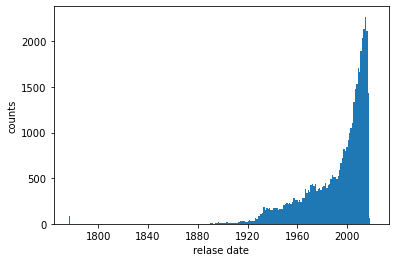

In [73]:
# plotting a historgram of the dates
bins=int(np.sqrt(len(movies_metadata['release_date'])))
plt.hist(movies_metadata['release_date'], bins=bins, histtype='bar')
plt.xlabel('relase date')
plt.ylabel('counts')
plt.show()

#### 3.3.10.3 Investigating the release dates by year

In [74]:
# extracts year from release date
movies_metadata['release_year']=movies_metadata['release_date'].apply(lambda row: row.year)

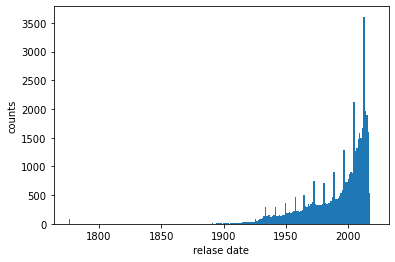

In [75]:
# plotting a historgram for release year
bins=int(np.sqrt(len(movies_metadata['release_year'])))
plt.hist(movies_metadata['release_year'], bins=bins, histtype='bar')
plt.xlabel('relase date')
plt.ylabel('counts')
plt.show()

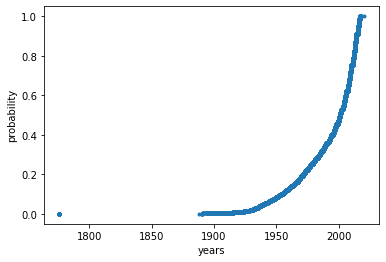

In [76]:
# graphing ECDF for release year
x, y=ECDF(movies_metadata['release_year'])

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('years')
plt.ylabel('probability')
plt.show()

In [77]:
# descriptive statistics
movies_metadata['release_year'].describe()

count    45418.000000
mean      1991.464375
std         25.853491
min       1776.000000
25%       1978.000000
50%       2001.000000
75%       2010.000000
max       2020.000000
Name: release_year, dtype: float64

#### 3.3.10.4 release date summary

The dates are left skewed, with the majorities occurs in the 2000' and on. Those movies with the date of 1776-07-04 are missing values. Since the first film was recorded on 1888-10-14, all of the dates prior to this are likely a mistake, so those dates will be reset to 1776-07-04. The median release year is 2001 with an IQR of 32 years, so the bulk of the movies are release between 1978 and 2010. 

### 3.3.11 Average Vote Count

#### 3.3.11.1 formatting

In [78]:
# Looking at the range of possible values
movies_metadata['vote_average'].unique()

array([ 7.7,  6.9,  6.5,  6.1,  5.7,  6.2,  5.4,  5.5,  6.6,  7.1,  7.8,
        7.2,  6.4,  6. ,  6.3,  7. ,  7.4,  7.6,  6.8,  7.3,  3.5,  6.7,
        8.1,  5.9,  5.2,  3. ,  5.8,  4.5,  4.4,  2.8,  4.1,  5.1,  3.9,
        7.5,  0. ,  7.9,  5.6,  3.3,  5.3,  4.3,  3.8,  5. ,  4. , 10. ,
        4.9,  4.6,  4.7,  2.5,  4.8,  8.2,  8.3,  8.5,  8. ,  2. ,  3.4,
        3.7,  4.2,  3.6,  2.7,  3.2,  2.9,  9. ,  9.3,  8.8,  8.7,  1.5,
        1.7,  3.1,  1. ,  8.4,  2.4,  8.6,  8.9,  1.2,  1.6,  2.3,  1.3,
        1.9,  0.5,  2.1,  2.6,  9.1,  1.8,  9.5,  9.2,  9.6,  2.2,  nan,
        1.4,  9.8,  9.4,  0.7,  1.1])

In [79]:
# replacing nan with 0
movies_metadata['vote_average']=movies_metadata['vote_average'].fillna(0)

#verifying it worked
movies_metadata['vote_average'].isna().any()

False

#### 3.3.11.2 Descriptive Statistics

In [80]:
movies_metadata['vote_average'].describe()

count    45418.000000
mean         5.618369
std          1.923848
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

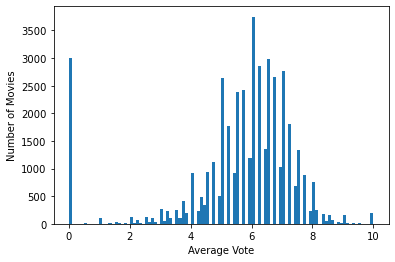

In [81]:
# bar graph for average vote count
plt.hist(movies_metadata['vote_average'], bins=100, histtype='bar')
plt.xlabel('Average Vote')
plt.ylabel('Number of Movies')
plt.show()

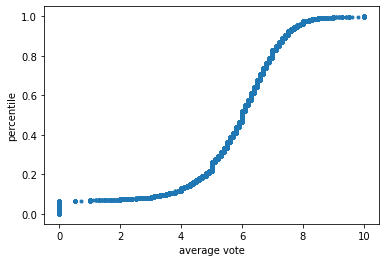

In [82]:
#ECDF for average vote
x, y =ECDF(movies_metadata['vote_average'])

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('average vote')
plt.ylabel('percentile')
plt.show()

In [83]:
string_count('vote_average', movies_metadata)

,count,prop_count
0.0,2993,0.065899
6.0,2467,0.054318
5.0,1996,0.043947
7.0,1884,0.041481
6.5,1721,0.037892
...,...,...
9.4,3,0.000066
9.8,1,0.000022
0.7,1,0.000022
9.6,1,0.000022


#### 3.3.11.3 Outlier Detection

In [84]:
def outlier_detect(colname, df):
    """outlier detection is based on 1.5 times the iqr. The function looks at each value an determines if
    it is a potential outlier. Make sure to create a new column caller 'outlier' in df before applying 
    this function.
    
    outlier_detect(colname, df)
    where colname is the column name and df is the dataframe you are interested in"""
    
    
    percent25=df[colname].quantile(.25)
    percent75=df[colname].quantile(.75)
    iqr=percent75 - percent25
    
    upper=percent75 + 1.5*iqr
    lower=percent25 - 1.5*iqr
    
    return lower, upper
    
    

In [85]:
# determing the upper and lower limits for possible outliers
lower, upper = outlier_detect('vote_average', movies_metadata)

print('The lower limit for outlier detection is {} while the upper limit is {}'.format(round(lower, 1), round(upper, 1)))

The lower limit for outlier detection is 2.3 while the upper limit is 9.5


In [86]:
# creating an outlier column
outlier=movies_metadata
outlier['outlier']=movies_metadata['vote_average'].apply(lambda row: 'outlier' if (row < lower or row > upper) else 'non-outlier')

In [87]:
outlier.loc[outlier['vote_average']<lower,['vote_average', 'outlier']].sort_values('vote_average', ascending=False)

,vote_average,outlier
37593,2.3,outlier
43000,2.3,outlier
18166,2.3,outlier
7768,2.3,outlier
43503,2.3,outlier
...,...,...
26146,0.0,outlier
26149,0.0,outlier
26152,0.0,outlier
26178,0.0,outlier


In [88]:
outlier.loc[outlier['vote_average']>upper,['vote_average', 'outlier']].sort_values('vote_average', ascending=False)

,vote_average,outlier
186,10.0,outlier
37838,10.0,outlier
37080,10.0,outlier
37291,10.0,outlier
37296,10.0,outlier
...,...,...
25661,10.0,outlier
25720,10.0,outlier
45323,10.0,outlier
20381,9.8,outlier


In [89]:
# Looking at the counts for outlier vs non-outliers
string_count('outlier', outlier)

,count,prop_count
non-outlier,41821,0.920802
outlier,3597,0.079198


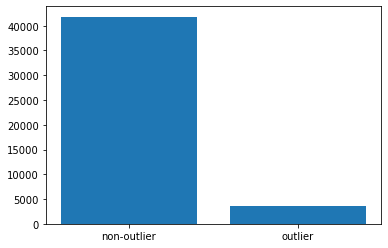

In [90]:
# bar graph of non-oultiers vs outlier counts
plt.bar(string_count('outlier', outlier).index, height=string_count('outlier', outlier)['count'])
plt.show()

#### 3.3.11.4 Vote Average Summary

The average vote_average is 5.6 while the median is 6. The data is slightly left skewed likely due to the 2,993 missing value, which are encoded as 0. The IQR is 1.8, which suggests the data is mostly centered, and the majority of data ranges between a rating of 5 and 6.8. There are 3,597 potential outliers that are less than 2.3 or larger than 9.5.

### 3.3.12 Revenue

#### 3.3.12.1 Format

In [91]:
movies_metadata['revenue'].unique()

array([3.73554033e+08, 2.62797249e+08, 0.00000000e+00, ...,
       1.32861200e+06, 1.26879300e+06, 1.41300000e+06])

In [92]:
# checking for missing values
movies_metadata['revenue'].isna().sum()

4

#### 3.3.12.2 Descriptive Statistics

In [93]:
movies_metadata['revenue'].describe()

count    4.541400e+04
mean     1.121683e+07
std      6.436312e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

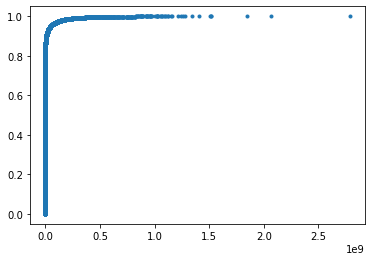

In [94]:
#plotting ecdf
x, y =ECDF(movies_metadata['revenue'])

plt.plot(x, y, marker='.', linestyle='none')
plt.show()

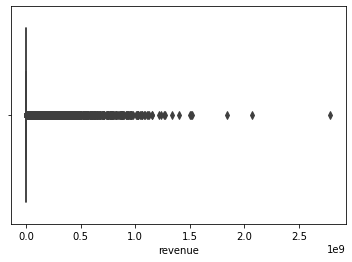

In [95]:
sns.boxplot(movies_metadata['revenue'])
plt.show()

#### 3.3.12.3 Dropping revenue Data

In [96]:
movies_metadata.drop(columns='revenue', inplace=True)
movies_metadata.head(3)

,id,imdb_id,original_language,overview,release_date,spoken_languages,title,vote_average,vote_count,genres_list,...,Mystery,War,Foreign,Music,Documentary,Western,production_companies_list,spoken_languages_list,release_year,outlier
0,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",...,0,0,0,0,0,0,[Pixar Animation Studios],[en],1995,non-outlier
1,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,1995-12-15,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,"[Adventure, Fantasy, Family]",...,0,0,0,0,0,0,"[TriStar Pictures, Teitler Film, Interscope Co...","[en, fr]",1995,non-outlier
2,15602,tt0113228,en,A family wedding reignites the ancient feud be...,1995-12-22,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,"[Romance, Comedy]",...,0,0,0,0,0,0,"[Warner Bros., Lancaster Gate]",[en],1995,non-outlier


#### 3.3.12.4 Revenue Summary

Since at least 75% of revenue data is zeros, the data is droped.

### 3.3.13 Vote Count

#### 3.3.13.1 Descriptive Statistics

In [97]:
movies_metadata['vote_count'].describe()

count    45414.000000
mean       109.971837
std        491.549122
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


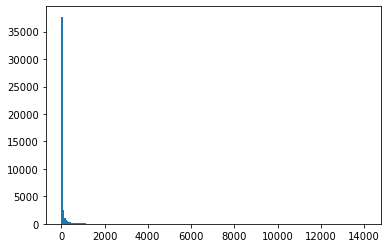

In [98]:
# histogram
plt.hist(movies_metadata['vote_count'], bins=int(np.sqrt(len(movies_metadata['vote_count']))))
plt.show()

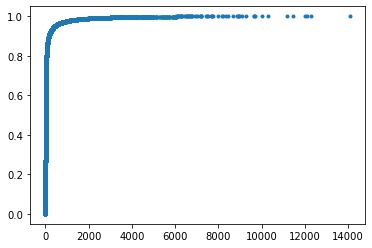

In [99]:
# ECDF
x,y = ECDF(movies_metadata['vote_count'])
plt.plot(x, y, marker='.', linestyle='none')
plt.show()

In [100]:
string_count('vote_count', movies_metadata)

,count,prop_count
1.0,3260,0.071784
2.0,3131,0.068943
0.0,2890,0.063637
3.0,2780,0.061215
4.0,2479,0.054587
...,...,...
4461.0,1,0.000022
1085.0,1,0.000022
1539.0,1,0.000022
2487.0,1,0.000022


#### 3.3.13.2 vote count summary

Vote count data is heavily rightly skewed where 75% of movies have only 34 or less votes, and the max movie has 14075. Approximately 6% of movies have 0 votes. 

### 3.3.14 Pairwise comparisons

In [101]:
movies_metadata.head(3)

,id,imdb_id,original_language,overview,release_date,spoken_languages,title,vote_average,vote_count,genres_list,...,Mystery,War,Foreign,Music,Documentary,Western,production_companies_list,spoken_languages_list,release_year,outlier
0,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",...,0,0,0,0,0,0,[Pixar Animation Studios],[en],1995,non-outlier
1,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,1995-12-15,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,"[Adventure, Fantasy, Family]",...,0,0,0,0,0,0,"[TriStar Pictures, Teitler Film, Interscope Co...","[en, fr]",1995,non-outlier
2,15602,tt0113228,en,A family wedding reignites the ancient feud be...,1995-12-22,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,"[Romance, Comedy]",...,0,0,0,0,0,0,"[Warner Bros., Lancaster Gate]",[en],1995,non-outlier


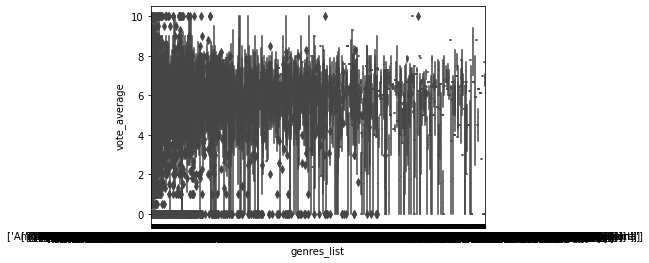

In [102]:
sns.boxplot(x=movies_metadata['genres_list'].apply(lambda row: str(row)), y=movies_metadata['vote_average'])
plt.show()

There are only two numerical variables (vote_counts and vote average) while the remaining variables are categorical. There are two many categories to visualize for the variables

## 3.4 Ratings

In [103]:
ratings.head(3)

,userId,movieId,rating
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0


### 3.4.2 Rating

#### 3.4.1 Descriptive Statistics

In [104]:
ratings['rating'].describe()

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

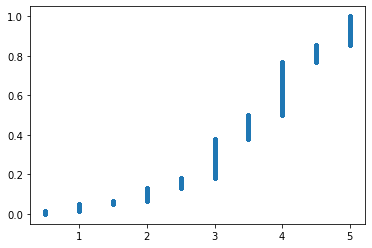

In [105]:
# ECDF
x, y = ECDF(ratings['rating'])

plt.plot(x, y, marker='.', linestyle='none')
plt.show()

The mean and median are very close and the IQR and standard deviation are very similiar, which suggests the data is symmetric. 

## 3.5 Keywords

### 3.5.1 Descriptive Statistics

In [106]:
keywords.head(3)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


## 3.5 Links

In [108]:
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


## 3.6 Saving Data

In [111]:
datapath='..\data'

save_file(movies_metadata, 'movies_metadata.cleaned.csv', datapath)
save_file(ratings, 'ratings.cleaned.csv', datapath)
save_file(links, 'links.cleaned.csv', datapath)
save_file(keywords, 'keywords.cleaned.csv', datapath)

Writing file.  "..\data\movies_metadata.cleaned.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "..\data\ratings.cleaned.csv"
Writing file.  "..\data\links.cleaned.csv"
Writing file.  "..\data\keywords.cleaned.csv"
